In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import pandas as pd
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression

## Importing Data 

In [2]:
cardata = pd.read_csv('1.04. Real-life example.csv')

In [3]:
cardata 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [4]:
cardata.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


**A Few Observations**

**1) PRESENCE OF OUTLIERS IN SOME FEATURES:** Outliers are present in the distributions of a few features (Price, Mileage, EngineV, Year). The most significant indicators being
a) The distance of the maximum. 
b) Minimum samples from the mean. 
***Solution: The outliers will be removed.***

**2) LITTLE OR NO VARIATION IN 'REGISTRATION' FIELD:** Registration seems to be yes for almost all datasets.

**3) UNIQUE NUMBER OF SAMPLES IN THE 'MODEL' FIELD:** The number of unique Cars models(Too High Variance) is too many for a regression model.
***Solution: For performance sakes, we will consider all other feature except Car models.***

In [5]:
cardata =cardata.drop(['Model'], axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e50cd1790>,
      dtype=object)

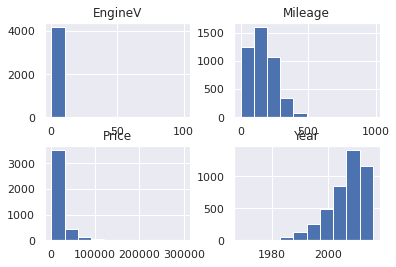

In [6]:
cardata.hist()

The diagram above shows the distribution of the numerical features. its shows that this features are affected by outliers 

## Data Preprocessing

**Removing Outliers**

In [7]:
data_no_outliers = cardata[cardata['Price']< cardata['Price'].quantile(0.95)]
data_no_outliers = data_no_outliers[data_no_outliers['EngineV']< 6.6]
data_no_outliers = data_no_outliers[data_no_outliers['Mileage']< data_no_outliers['Mileage'].quantile(0.99)]
data_no_outliers = data_no_outliers[data_no_outliers['Year']>data_no_outliers['Year'].quantile(0.03)]
data_no_outliers.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3622,3622.000000,3622,3622.000000,3622.000000,3622,3622,3622.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,818,NaN,1372,NaN,NaN,1682,3262,NaN
mean,NaN,15464.990146,NaN,164.668691,2.416419,NaN,NaN,2006.746273
std,NaN,12165.383872,NaN,90.480473,0.928390,NaN,NaN,5.465258
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1992.000000
25%,NaN,7300.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19999.000000,NaN,225.750000,3.000000,NaN,NaN,2011.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e4e5d6250>,
      dtype=object)

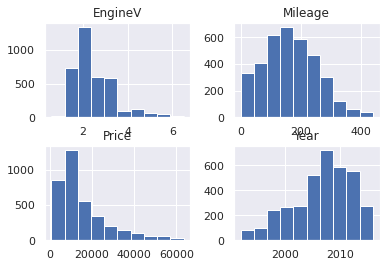

In [8]:
data_no_outliers.hist()# AfterOutliers have been removed in Price 

**Dealing With Missing Values**

In [9]:
data_no_outliers.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

We can see we dont have any missing values 

**Checking OLS**

Text(0.5, 1.0, 'Year Vs Mileage')

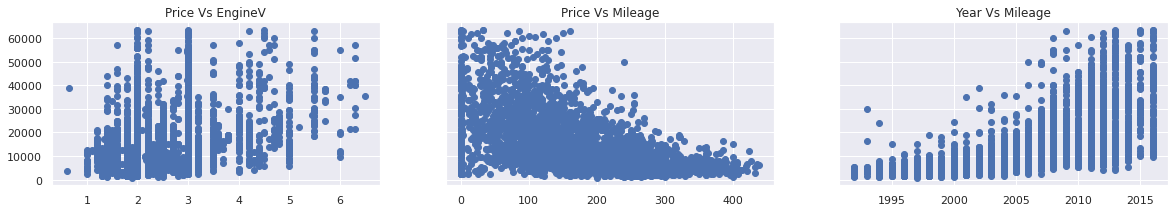

In [10]:
f, (plt1, plt2, plt3) = plt.subplots(1,3, sharey=True, figsize = [20, 3])
plt1.scatter(data_no_outliers['EngineV'],data_no_outliers['Price'] )
plt1.set_title('Price Vs EngineV')
plt2.scatter(data_no_outliers['Mileage'],data_no_outliers['Price'] )
plt2.set_title('Price Vs Mileage')
plt3.scatter(data_no_outliers['Year'],data_no_outliers['Price'] )
plt3.set_title('Year Vs Mileage')

The High level view shows thats the relationship of features are not linear to Price. To use a Linear regression in this type of case we have to convert the features with log 

In [11]:
Price = np.log(data_no_outliers['Price'])


data_no_outliers['Pricelog'] =Price


In [12]:
data_no_outliers

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Pricelog
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,8.716044
...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Price Vs Year')

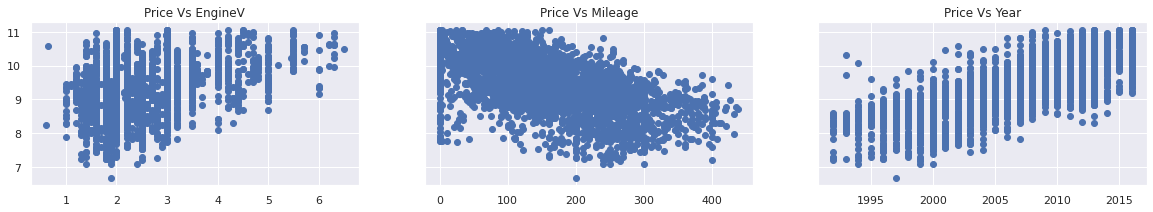

In [13]:
f, (plt1, plt2, plt3) = plt.subplots(1,3, sharey=True, figsize = [20, 3])
plt1.scatter(data_no_outliers['EngineV'],data_no_outliers['Pricelog'] )
plt1.set_title('Price Vs EngineV')
plt2.scatter(data_no_outliers['Mileage'],data_no_outliers['Pricelog'] )
plt2.set_title('Price Vs Mileage')
plt3.scatter(data_no_outliers['Year'],data_no_outliers['Pricelog'] )
plt3.set_title('Price Vs Year')

**Checking for MultiCollinearity**

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = data_no_outliers[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VLF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['features'] = features.columns

In [15]:
vif

,VLF,features
0,10.291128,Year
1,4.315811,Mileage
2,7.824053,EngineV


We will drop the Year column due to a high VIF of above 10. This shows it is correlated with the other variables 

In [16]:
data_no_outliers_collinearity = data_no_outliers.drop(['Year'], axis=1)

**Dealing with the Categorical Features** 

In [17]:

dummydata_no_outliers=pd.get_dummies(data_no_outliers_collinearity, drop_first= True)

In [18]:
dummydata_no_outliers

,Price,Mileage,EngineV,Pricelog,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
6,6100.0,438,2.0,8.716044,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,6800.0,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
4338,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4341,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = dummydata_no_outliers[['Mileage','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes']]
vif = pd.DataFrame()
vif['VLF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif['features'] = features.columns

In [20]:
vif

,VLF,features
0,4.373775,Mileage
1,2.057487,Brand_BMW
2,2.563967,Brand_Mercedes-Benz
3,1.656309,Brand_Mitsubishi
4,2.138550,Brand_Renault
5,2.073655,Brand_Toyota
6,2.869690,Brand_Volkswagen
7,1.420537,Body_hatch
8,1.559433,Body_other
9,3.098013,Body_sedan


# Linear Regression Model

In [21]:
Finaldata=dummydata_no_outliers[['Mileage','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes','EngineV', 'Pricelog']]




In [22]:
Finaldata

,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,EngineV,Pricelog
1,427,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2.9,8.974618
2,358,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,5.0,9.495519
3,240,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4.2,10.043249
4,120,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2.0,9.814656
6,438,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2.0,8.716044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1.6,8.824678
4338,163,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2.5,9.350102
4339,35,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1.6,9.792556
4341,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,3.5,8.779557


In [23]:
y = Finaldata['Pricelog']
x = Finaldata.drop(['Pricelog'], axis = 1)

**Scale the data**

In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [25]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=0.2, random_state= 42)

In [26]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_hat =reg.predict(x_train)

In [28]:
y_hat

array([ 9.84712606,  9.27134722,  8.83155744, ...,  9.58167962,
       10.0187493 ,  9.18498428])

Text(0.5, 1.0, 'Test Plot')

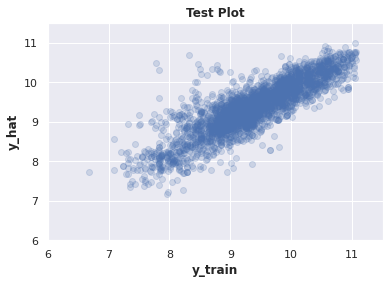

In [29]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('y_train', fontweight='bold')
plt.ylabel('y_hat', fontweight= 'bold')
plt.xlim(6,11.5)
plt.ylim(6,11.5)
plt.title("Test Plot", fontweight='bold')

**Residual plot**

Text(0.5, 1.0, 'Residual plot')

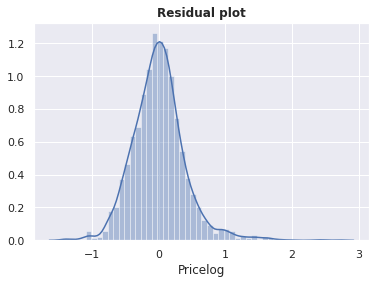

In [30]:
sns.distplot(y_hat- y_train)
plt.title("Residual plot", fontweight ="bold")

The prediciton is generally fine, However it more likely to overestimate the Price than underestimate it, due to the distribution 

**Weights and bias**

In [31]:
reg.score(x_train, y_train)

0.7319686861189596

In [32]:
reg.intercept_

9.357279720370455

In [33]:
reg.coef_

array([-0.38522665,  0.01306258, -0.02408147, -0.14043954, -0.18877481,
       -0.05857995, -0.08429688, -0.13910214, -0.08533085, -0.17260734,
       -0.12185989, -0.15693618, -0.1019132 , -0.02481655, -0.12818522,
        0.33298957,  0.18628567])

In [34]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.385227
1,Brand_BMW,0.013063
2,Brand_Mercedes-Benz,-0.024081
3,Brand_Mitsubishi,-0.140440
4,Brand_Renault,-0.188775
5,Brand_Toyota,-0.058580
6,Brand_Volkswagen,-0.084297
7,Body_hatch,-0.139102
8,Body_other,-0.085331
9,Body_sedan,-0.172607


## Testing

In [35]:
y_hat_test = reg.predict(x_test)

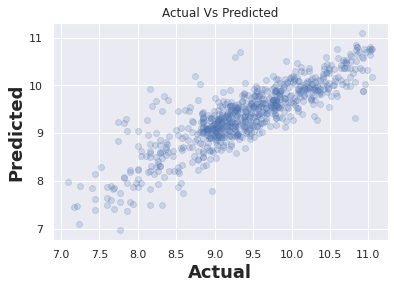

In [36]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Actual', fontweight='bold', fontsize=18) 
plt.ylabel('Predicted', fontweight='bold', fontsize=18)
plt.title('Actual Vs Predicted')
plt.show()

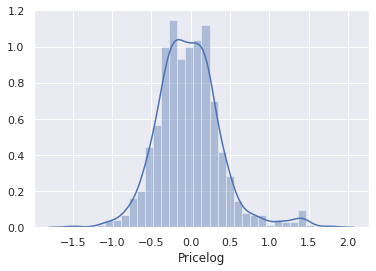

In [37]:
sns.distplot(y_hat_test-y_test)

We have to convert the Pricelog back to normal


In [38]:
FirstModelPrice =pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
FirstModelPrice.head()
FirstModelPrice['Actual'] = np.exp(y_test.reset_index(drop=True))
FirstModelPrice['Residual'] = FirstModelPrice['Actual'] -FirstModelPrice['Prediction']
FirstModelPrice['%'] = FirstModelPrice['Residual']*100 / FirstModelPrice['Actual']

In [39]:
FirstModelPrice.round(2)

,Prediction,Actual,Residual,%
0,8092.77,11000.0,2907.23,26.43
1,19181.43,28999.0,9817.57,33.85
2,11494.25,9400.0,-2094.25,-22.28
3,14587.17,16900.0,2312.83,13.69
4,10973.04,8500.0,-2473.04,-29.09
...,...,...,...,...
720,4073.01,4000.0,-73.01,-1.83
721,10537.88,9300.0,-1237.88,-13.31
722,9403.95,8200.0,-1203.95,-14.68
723,13809.84,10800.0,-3009.84,-27.87


In [40]:
FirstModelPrice.describe()

,Prediction,Actual,Residual,%
count,725.000000,725.000000,725.000000,725.000000
mean,14296.518465,15988.433793,1691.915328,-6.745413
std,9360.851480,12813.550204,6988.748931,56.467516
min,1058.127338,1200.000000,-32824.874524,-488.462596
25%,8157.521657,7650.000000,-1846.797202,-21.456432
50%,11935.708176,11600.000000,416.694387,4.360344
75%,18370.051371,20200.000000,3831.261576,24.255983
max,66235.149413,63000.000000,38859.577753,77.719156


## Improving Our Model
After seeing the stats of the first model. It is seen that the model is good, however it can still be improved. We will thereby bring back the feature 'Year' that was previously dropped.

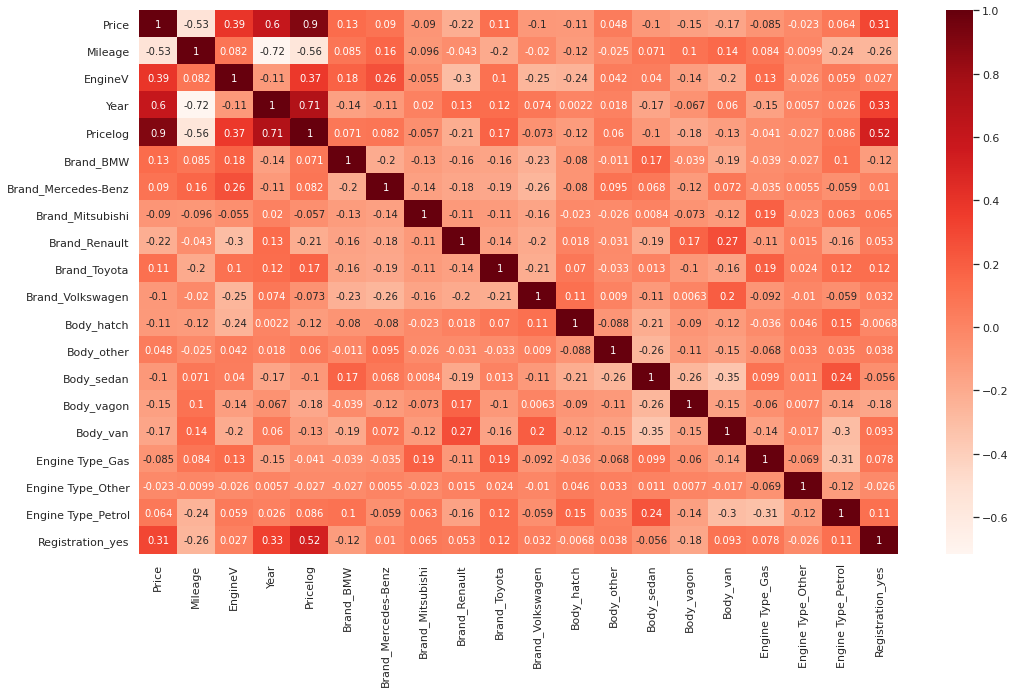

In [41]:
FeatureScaling=pd.get_dummies(data_no_outliers, drop_first= True)
plt.figure(figsize=(17,10))
cor = FeatureScaling.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the Heatmap, we can see that some of the fields are not necessarily correlated with the Price and as such we might as well drop them.

In [42]:
cor_target =abs(cor['Pricelog'])
relevant_features = cor_target[cor_target>0.5]

In [43]:
relevant_features

Price               0.903612
Mileage             0.559809
Year                0.708344
Pricelog            1.000000
Registration_yes    0.517697
Name: Pricelog, dtype: float64

We can notice here than the highest features that the bigest corelations exists in Year, Then registration_yes, then Mileage 

In [44]:
print(FeatureScaling[["Mileage","Year"]].corr())
print(FeatureScaling[["Mileage","Registration_yes"]].corr())
print(FeatureScaling[["Year","Registration_yes"]].corr())

          Mileage      Year
Mileage  1.000000 -0.716159
Year    -0.716159  1.000000
                  Mileage  Registration_yes
Mileage           1.00000          -0.25909
Registration_yes -0.25909           1.00000
                      Year  Registration_yes
Year              1.000000          0.330086
Registration_yes  0.330086          1.000000


We already know that Year correlates with one of the other variables, so we try to correlate the other features to know which feature corrleates with which. We discover that the Year correlates with Mileage, makes sense. We will in this case keep 'Year' Since its more correlated than Mileage to Price.


The other fields are dummy data will be added. As the R-square was a lot better after the where added. Now the other steps will be carried to get a better model 



In [45]:
x_afterscaling=FeatureScaling[['Year','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes']]
y_aftersaling=FeatureScaling[['Pricelog']]

In [46]:
from sklearn.model_selection import train_test_split 
x_second_train, x_second_test, y_second_train, y_second_test=train_test_split(x_afterscaling,y_aftersaling, test_size=0.2, random_state= 42)
reg = LinearRegression()
reg.fit(x_second_train, y_second_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_second_hat =reg.predict(x_second_train)

In [48]:
reg.score(x_second_train, y_second_train)

0.8320431196850544

The R square value of the new model is better (0.83(New) vs 0.76(Old))

## Comparing the two models 

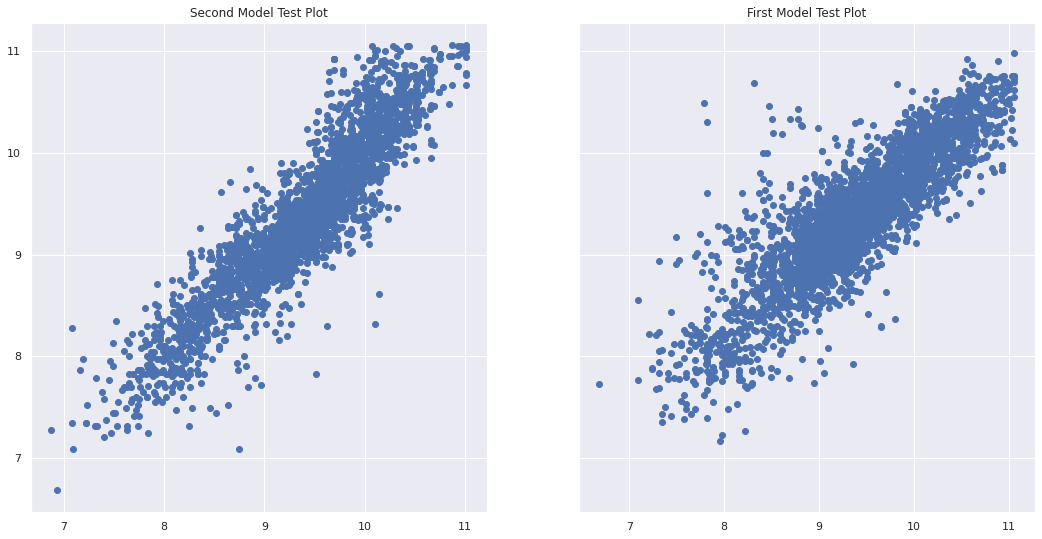

In [49]:
f, (plt1, plt2) = plt.subplots(1,2, sharey=True, figsize = [18, 9])
plt1.scatter(y_second_hat,y_second_train)
plt1.title.set_text('Second Model Test Plot')
plt2.scatter(y_train, y_hat)
plt2.title.set_text('First Model Test Plot')

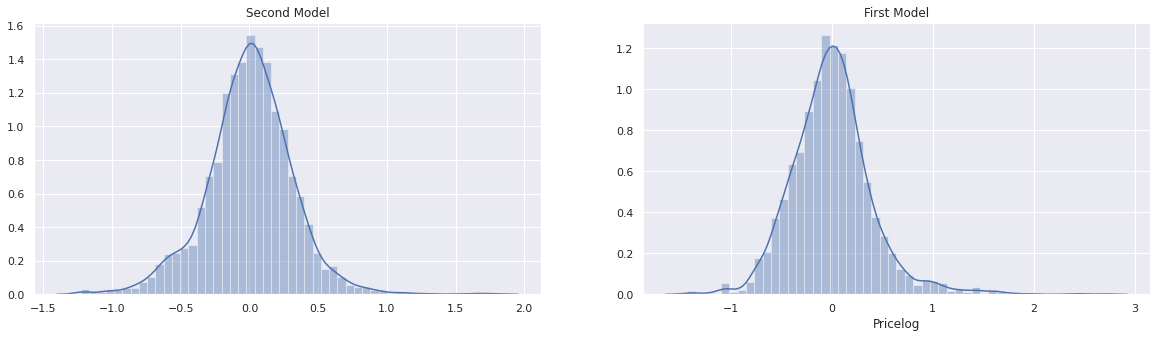

In [50]:
f, axs = plt.subplots(ncols=2, figsize =[20,5])


sns.distplot(y_second_hat- y_second_train, ax=axs[0])
axs[0].title.set_text('Second Model')
sns.distplot(y_hat- y_train, ax=axs[1])
axs[1].title.set_text('First Model')

The residual distribution of the second model is much more central around 0.00. Therefore its should be more accurate 

In [51]:
y_second_predict_hat=reg.predict(x_second_test)

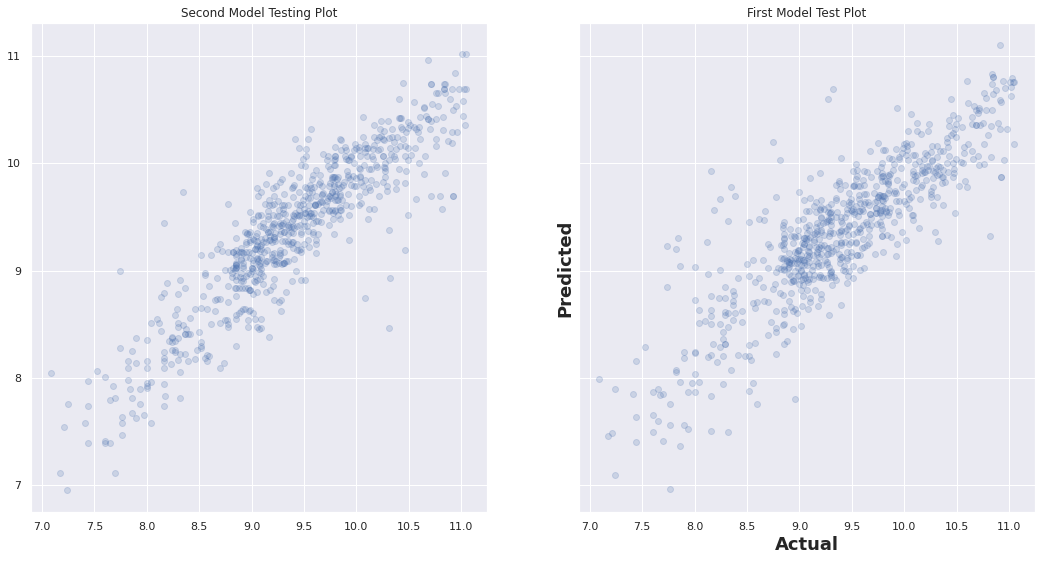

In [52]:
f, (plt1, plt2) = plt.subplots(1,2, sharey=True, figsize = [18, 9])
plt1.scatter(y_second_test,y_second_predict_hat, alpha=0.2)
plt1.title.set_text('Second Model Testing Plot')
plt.xlabel('Actual', fontweight='bold', fontsize=18) 
plt.ylabel('Predicted', fontweight='bold', fontsize=18)


plt2.scatter(y_test, y_hat_test, alpha=0.2)

plt2.title.set_text('First Model Test Plot')

plt.show()

In [60]:
FirstModelPrice['Second_Prediction'] =np.exp(y_second_predict_hat)
FirstModelPrice['Second_Actual'] = np.exp(y_second_test.reset_index(drop=True))
FirstModelPrice['Second_Residual'] = FirstModelPrice['Second_Actual'] -FirstModelPrice['Second_Prediction']
FirstModelPrice['2nd%'] = FirstModelPrice['Second_Residual']*100 / FirstModelPrice['Second_Actual']


In [62]:
FirstModelPrice.describe()

,Prediction,Actual,Residual,%,Second_Prediction,Second_Actual,Second_Residual,2nd%
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,14296.518465,15988.433793,1691.915328,-6.745413,14684.887524,15988.433793,1303.546269,-3.792696
std,9360.851480,12813.550204,6988.748931,56.467516,9744.235362,12813.550204,6665.670829,36.852191
min,1058.127338,1200.000000,-32824.874524,-488.462596,1046.138614,1200.000000,-16051.536443,-302.189467
25%,8157.521657,7650.000000,-1846.797202,-21.456432,7957.591941,7650.000000,-1730.859300,-20.000116
50%,11935.708176,11600.000000,416.694387,4.360344,12630.859300,11600.000000,70.144937,0.659772
75%,18370.051371,20200.000000,3831.261576,24.255983,19089.772914,20200.000000,2646.196786,19.682903
max,66235.149413,63000.000000,38859.577753,77.719156,60968.376872,63000.000000,39275.970302,84.154406


The second model has been placed side to side with the first model in terms of stats. It is seen that the variance from the target is generally lower and as such we can conclude that it is a much more accurate model. 